In [18]:
import numpy as np
import pandas as pd

In [19]:
df=pd.read_csv('../dataset/Life_Expectancy_Data_Chinese.csv')
df.head()

,国家,年份,预期寿命,成人死亡率,婴儿死亡数,酒精消费,五岁以下死亡数,乙肝疫苗接种率,麻疹病例数,BMI指数,脊髓灰质炎疫苗接种率,白喉疫苗接种率,HIV/AIDS死亡率,GDP人均,人口数量(百万),10-19岁消瘦率,5-9岁消瘦率,受教育年限,发达国家,发展中国家
0,Afghanistan,2015,63.4,227.735,53.2,0.00,70.4,65,42,23.3,67,65,0.03,556,34.41,17.2,17.3,3.6,0,1
1,Afghanistan,2014,63.0,231.978,55.2,0.01,73.6,62,44,23.2,62,62,0.03,565,33.37,17.5,17.5,3.5,0,1
2,Afghanistan,2013,62.5,236.221,57.3,0.01,76.9,64,38,23.0,64,64,0.03,569,32.27,17.7,17.7,3.5,0,1
3,Afghanistan,2012,62.1,240.464,59.5,0.01,80.3,67,33,22.9,67,67,0.03,558,31.16,17.9,18.0,3.4,0,1
4,Afghanistan,2011,61.6,245.300,61.8,0.01,84.0,68,31,22.8,68,68,0.02,512,30.12,18.2,18.2,3.3,0,1


In [20]:
df.isnull().sum()

国家             0
年份             0
预期寿命           0
成人死亡率          0
婴儿死亡数          0
酒精消费           0
五岁以下死亡数        0
乙肝疫苗接种率        0
麻疹病例数          0
BMI指数          0
脊髓灰质炎疫苗接种率     0
白喉疫苗接种率        0
HIV/AIDS死亡率    0
GDP人均          0
人口数量(百万)       0
10-19岁消瘦率      0
5-9岁消瘦率        0
受教育年限          0
发达国家           0
发展中国家          0
dtype: int64

使用spsspro网站-缺失值处理-k近邻填充

In [21]:
df_filled=pd.read_csv("D:\HP\OneDrive\Desktop\学习\专业课\认识实习\life-expectancy-analysis\dataset\\Life_Expectancy_Data_Filled.csv")
df_filled.isnull().sum()

<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\HP\AppData\Local\Temp\ipykernel_33804\1907109083.py:1: SyntaxWarning: invalid escape sequence '\H'
  df_filled=pd.read_csv("D:\HP\OneDrive\Desktop\学习\专业课\认识实习\life-expectancy-analysis\dataset\\Life_Expectancy_Data_Filled.csv")


国家             0
年份             0
预期寿命           0
成人死亡率          0
婴儿死亡数          0
酒精消费           0
五岁以下死亡数        0
乙肝疫苗接种率        0
麻疹病例数          0
BMI指数          0
脊髓灰质炎疫苗接种率     0
白喉疫苗接种率        0
HIV/AIDS死亡率    0
GDP人均          0
人口数量(百万)       0
10-19岁消瘦率      0
5-9岁消瘦率        0
受教育年限          0
发达国家           0
发展中国家          0
dtype: int64

In [22]:
df_filled.to_csv("..\dataset\Life_Expectancy_Data_Filled.csv", index=False)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_33804\2273780569.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_filled.to_csv("..\dataset\Life_Expectancy_Data_Filled.csv", index=False)


In [23]:
df_filled.duplicated().sum()

0

In [24]:
#对每个特征值绘制箱型图
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 获取数值型列
def draw_boxplots(df):

    numeric_columns = df_filled.select_dtypes(include=[np.number]).columns.tolist()

    # 计算子图数量和布局
    n_cols = 4  # 每行3个图
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

    # 创建子图
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    fig.suptitle('各特征值箱型图分析', fontsize=16, y=0.98)

    # 将axes转换为一维数组，便于遍历
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()

    # 为每个数值型特征绘制箱型图
    for i, column in enumerate(numeric_columns):
        sns.boxplot(y=df_filled[column], ax=axes[i])
        axes[i].set_title(f'{column}箱型图')
        axes[i].set_ylabel(column)
        
        # 添加统计信息
        q1 = df_filled[column].quantile(0.25)
        q3 = df_filled[column].quantile(0.75)
        median = df_filled[column].median()
        iqr = q3 - q1
        outliers_count = len(df_filled[(df_filled[column] < q1 - 1.5*iqr) | 
                                    (df_filled[column] > q3 + 1.5*iqr)])
        
        axes[i].text(0.02, 0.98, f'异常值数量: {outliers_count}', 
                    transform=axes[i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # 隐藏多余的子图
    for i in range(len(numeric_columns), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    # 打印每个特征的异常值统计
    print("各特征异常值统计:")
    print("-" * 50)
    for column in numeric_columns:
        q1 = df_filled[column].quantile(0.25)
        q3 = df_filled[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        outliers = df_filled[(df_filled[column] < lower_bound) | 
                            (df_filled[column] > upper_bound)]
        
        print(f"{column}: {len(outliers)}个异常值 ({len(outliers)/len(df_filled)*100:.2f}%)")

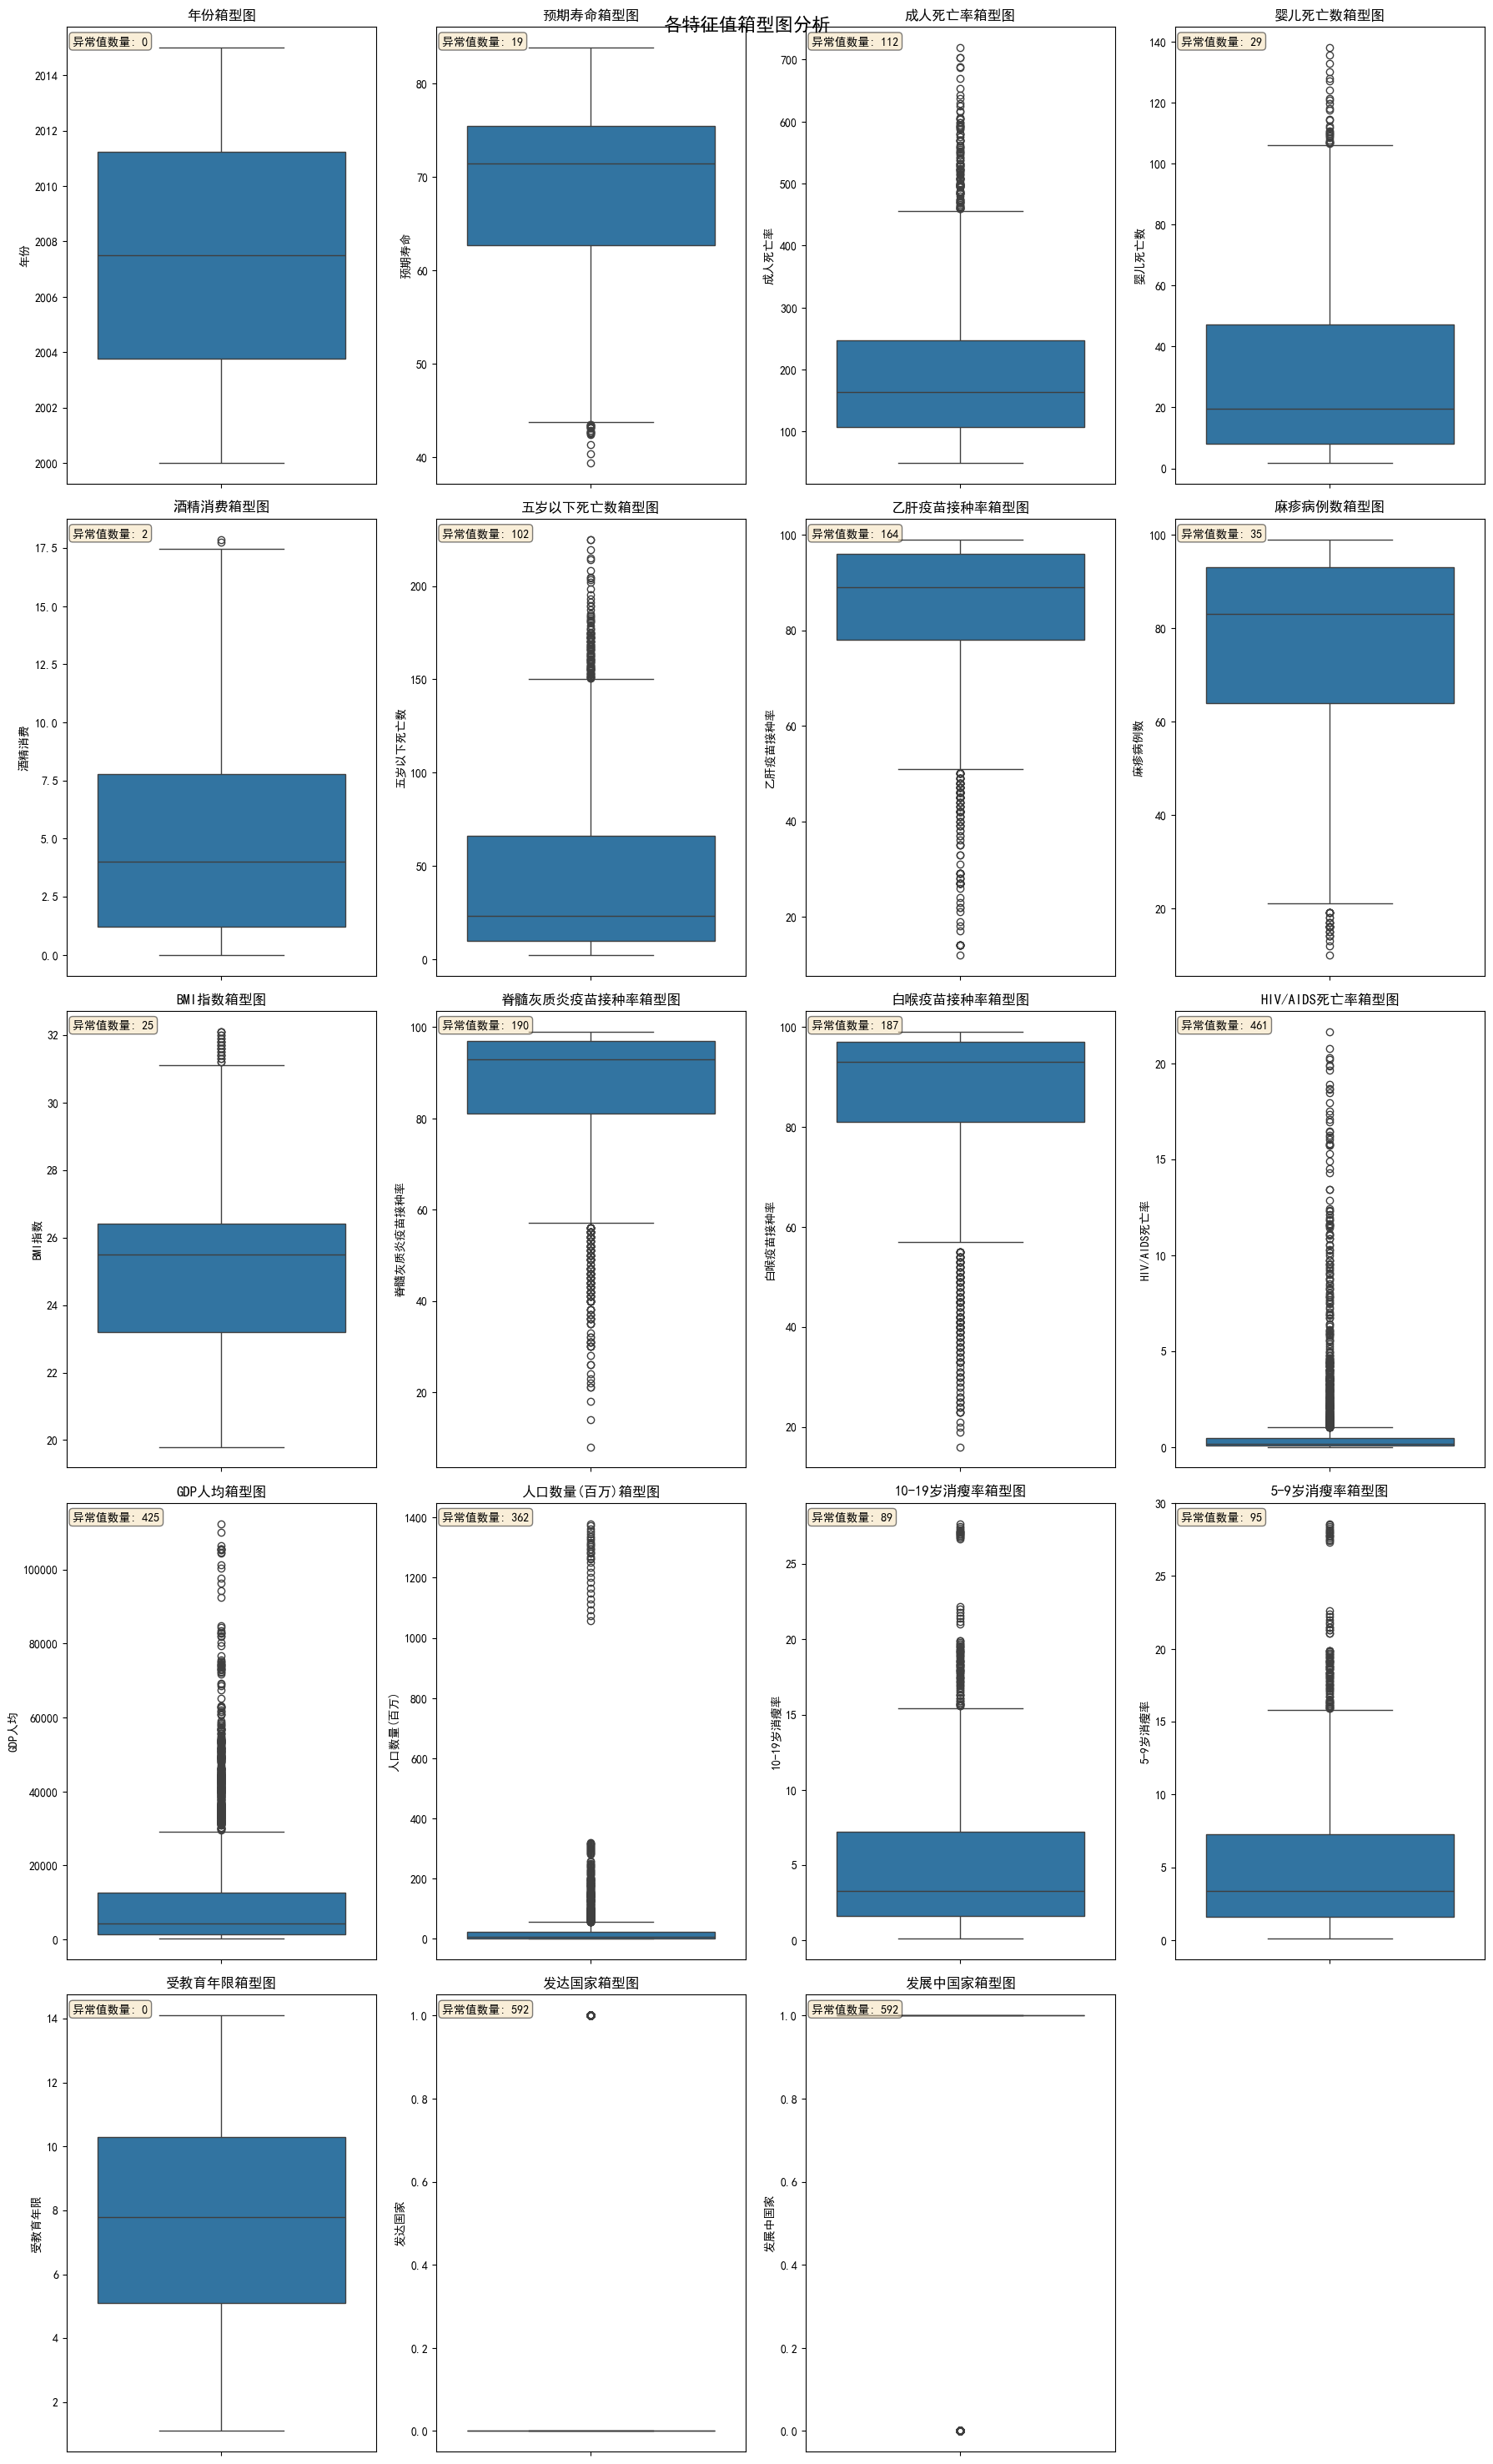

各特征异常值统计:
--------------------------------------------------
年份: 0个异常值 (0.00%)
预期寿命: 19个异常值 (0.66%)
成人死亡率: 112个异常值 (3.91%)
婴儿死亡数: 29个异常值 (1.01%)
酒精消费: 2个异常值 (0.07%)
五岁以下死亡数: 102个异常值 (3.56%)
乙肝疫苗接种率: 164个异常值 (5.73%)
麻疹病例数: 35个异常值 (1.22%)
BMI指数: 25个异常值 (0.87%)
脊髓灰质炎疫苗接种率: 190个异常值 (6.63%)
白喉疫苗接种率: 187个异常值 (6.53%)
HIV/AIDS死亡率: 461个异常值 (16.10%)
GDP人均: 425个异常值 (14.84%)
人口数量(百万): 362个异常值 (12.64%)
10-19岁消瘦率: 89个异常值 (3.11%)
5-9岁消瘦率: 95个异常值 (3.32%)
受教育年限: 0个异常值 (0.00%)
发达国家: 592个异常值 (20.67%)
发展中国家: 592个异常值 (20.67%)


In [25]:
draw_boxplots(df_filled)

In [26]:
#使用盖帽法处理异常值
def cap_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # 使用盖帽法处理异常值
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df
# 对所有数值型列应用盖帽法
for column in numeric_columns:
    df_filled = cap_outliers(df_filled, column)

draw_boxplots(df_filled)

NameError: name 'numeric_columns' is not defined

In [ ]:
print(df_filled.columns)

Index(['国家', '年份', '发展状态', '预期寿命', '成人死亡率', '婴儿死亡数', '酒精消费', '医疗支出百分比',
       '乙肝疫苗接种率', '麻疹病例数', 'BMI指数', '五岁以下死亡数', '脊髓灰质炎疫苗接种率', '总医疗支出',
       '白喉疫苗接种率', 'HIV/AIDS死亡率', 'GDP', '人口数量', '1-19岁消瘦率', '5-9岁消瘦率',
       '收入构成资源', '受教育年限'],
      dtype='object')


In [ ]:
df_transformed = df_filled.copy()

In [ ]:
#one-hot编码处理分类变量
import pandas as pd
import numpy as np

# 识别分类变量
categorical_columns = df_transformed.select_dtypes(include=['object']).columns.tolist()
print(f"分类变量列: {categorical_columns}")

# 查看每个分类变量的唯一值
print("\n各分类变量的唯一值:")
print("-" * 40)
for col in categorical_columns:
    unique_values = df_transformed[col].unique()
    print(f"{col}: {unique_values} (共{len(unique_values)}个类别)")
    print()

分类变量列: ['国家', '发展状态']

各分类变量的唯一值:
----------------------------------------
国家: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' '

In [ ]:
df_transformed.head()

,国家,年份,发展状态,预期寿命,成人死亡率,婴儿死亡数,酒精消费,医疗支出百分比,乙肝疫苗接种率,麻疹病例数,...,脊髓灰质炎疫苗接种率,总医疗支出,白喉疫苗接种率,HIV/AIDS死亡率,GDP,人口数量,1-19岁消瘦率,5-9岁消瘦率,收入构成资源,受教育年限
0,Afghanistan,2015.0,Developing,65.0,263.0,55.0,0.01,71.279624,65.0,900.625,...,49.5,8.16,65.0,0.1,584.259210,1.863166e+07,15.5375,15.6,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,55.0,0.01,73.523582,62.0,492.000,...,58.0,8.18,62.0,0.1,612.696514,3.275820e+05,15.5375,15.6,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,55.0,0.01,73.219243,64.0,430.000,...,62.0,8.13,64.0,0.1,631.744976,1.863166e+07,15.5375,15.6,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,55.0,0.01,78.184215,67.0,900.625,...,67.0,8.52,67.0,0.1,669.959000,3.696958e+06,15.5375,15.6,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,55.0,0.01,7.097109,68.0,900.625,...,68.0,7.87,68.0,0.1,63.537231,2.978599e+06,15.5375,15.6,0.454,9.5


In [ ]:
status_map = {'Developing': 0, 'Developed': 1}

# 将分类变量转换为数值
df_transformed['发展状态_数值'] = df_transformed['发展状态'].map(status_map)
df_transformed.drop(columns=['发展状态'], inplace=True)  # 删除原始分类列
# 查看结果
print("转换后的前5行:")
print(df_transformed.head())

# 查看唯一值确认转换成功
print("\n发展状态_数值的唯一值:", df_transformed['发展状态_数值'].unique())

# 保存转换后的数据集
df_transformed.to_csv("..\dataset\Life_Expectancy_Data_Transformed_Final.csv", index=False)

转换后的前5行:
            国家      年份  预期寿命  成人死亡率  婴儿死亡数  酒精消费    医疗支出百分比  乙肝疫苗接种率    麻疹病例数  \
0  Afghanistan  2015.0  65.0  263.0   55.0  0.01  71.279624     65.0  900.625   
1  Afghanistan  2014.0  59.9  271.0   55.0  0.01  73.523582     62.0  492.000   
2  Afghanistan  2013.0  59.9  268.0   55.0  0.01  73.219243     64.0  430.000   
3  Afghanistan  2012.0  59.5  272.0   55.0  0.01  78.184215     67.0  900.625   
4  Afghanistan  2011.0  59.2  275.0   55.0  0.01   7.097109     68.0  900.625   

   BMI指数  ...  总医疗支出  白喉疫苗接种率  HIV/AIDS死亡率         GDP          人口数量  \
0   19.1  ...   8.16     65.0          0.1  584.259210  1.863166e+07   
1   18.6  ...   8.18     62.0          0.1  612.696514  3.275820e+05   
2   18.1  ...   8.13     64.0          0.1  631.744976  1.863166e+07   
3   17.6  ...   8.52     67.0          0.1  669.959000  3.696958e+06   
4   17.2  ...   7.87     68.0          0.1   63.537231  2.978599e+06   

   1-19岁消瘦率  5-9岁消瘦率  收入构成资源  受教育年限  发展状态_数值  
0   15.5375     15.6   0

<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_10128\587019361.py:14: SyntaxWarning: invalid escape sequence '\d'
  df_transformed.to_csv("..\dataset\Life_Expectancy_Data_Transformed_Final.csv", index=False)
